Bayes classifier accuracy: 0.85


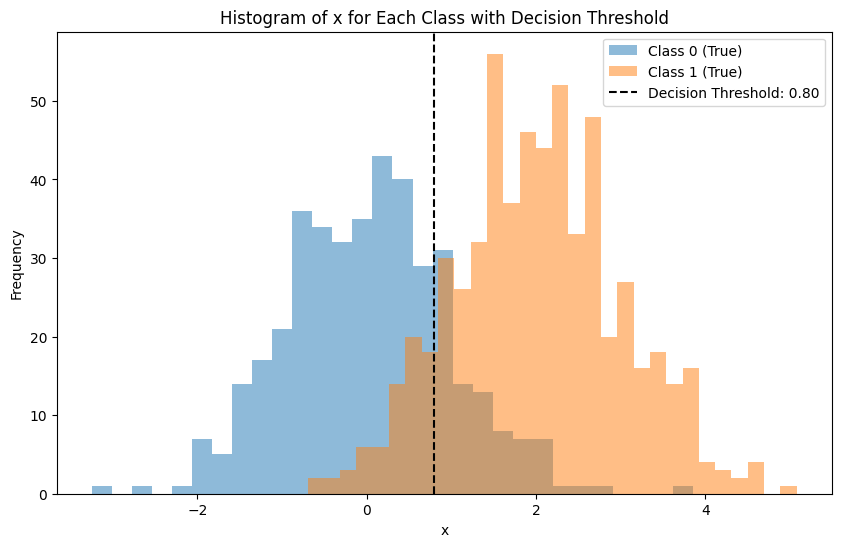

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

def generate_data(n_samples: int = 1000, 
                  prior_y0: float = 0.5, 
                  mu0: float = 0.0, sigma0: float = 1.0, 
                  mu1: float = 2.0, sigma1: float = 1.0, 
                  random_seed: int = 42) -> Tuple[np.ndarray, np.ndarray]:
    """
    Generate a 1D dataset for two classes (y=0, y=1).

    The conditional distributions are:
        x|y=0 ~ Normal(mu0, sigma0^2)
        x|y=1 ~ Normal(mu1, sigma1^2)

    Priors:
        P(y=0) = prior_y0
        P(y=1) = 1 - prior_y0

    Parameters:
        n_samples: Total number of samples.
        prior_y0: Prior probability for class 0.
        mu0, sigma0: Mean and standard deviation for class 0.
        mu1, sigma1: Mean and standard deviation for class 1.
        random_seed: Seed for reproducibility.

    Returns:
        x_all: Array of feature values.
        y_all: Array of corresponding class labels.
    """
    np.random.seed(random_seed)
    n_y0 = int(n_samples * prior_y0)
    n_y1 = n_samples - n_y0

    x_y0 = np.random.normal(loc=mu0, scale=sigma0, size=n_y0)
    x_y1 = np.random.normal(loc=mu1, scale=sigma1, size=n_y1)

    x_all = np.concatenate([x_y0, x_y1])
    y_all = np.array([0] * n_y0 + [1] * n_y1)

    return x_all, y_all

def gaussian_pdf(x: np.ndarray, mean: float, std: float) -> np.ndarray:
    """
    Compute the probability density function for a normal distribution.

    Parameters:
        x: Input array of values.
        mean: Mean of the distribution.
        std: Standard deviation of the distribution.

    Returns:
        The PDF evaluated at each element in x.
    """
    coefficient = 1.0 / (np.sqrt(2.0 * np.pi) * std)
    exponent = np.exp(-0.5 * ((x - mean) / std) ** 2)
    return coefficient * exponent

def bayes_classifier(x_test: np.ndarray, 
                     prior_y0: float, 
                     prior_y1: float, 
                     mu0: float, sigma0: float, 
                     mu1: float, sigma1: float) -> np.ndarray:
    """
    Classify test samples using the Bayes optimal decision rule.

    For each x in x_test, compute the unnormalized posteriors:
        P(y=0|x) ∝ P(x|y=0) * prior_y0
        P(y=1|x) ∝ P(x|y=1) * prior_y1

    The predicted class is chosen by comparing these values.

    Parameters:
        x_test: Array of test samples.
        prior_y0: Prior probability for class 0.
        prior_y1: Prior probability for class 1.
        mu0, sigma0: Mean and standard deviation for class 0.
        mu1, sigma1: Mean and standard deviation for class 1.

    Returns:
        y_pred: Array of predicted class labels (0 or 1).
    """
    post_y0 = gaussian_pdf(x_test, mu0, sigma0) * prior_y0
    post_y1 = gaussian_pdf(x_test, mu1, sigma1) * prior_y1

    return np.where(post_y0 > post_y1, 0, 1)

def compute_decision_threshold(prior_y0: float, 
                               prior_y1: float, 
                               mu0: float, 
                               mu1: float, 
                               sigma: float) -> float:
    """
    Compute the decision threshold for the Bayes classifier when the standard 
    deviations of both classes are equal.

    This threshold is the value of x at which:
        P(x|y=0) * prior_y0 = P(x|y=1) * prior_y1

    Parameters:
        prior_y0: Prior probability for class 0.
        prior_y1: Prior probability for class 1.
        mu0, mu1: Means for classes 0 and 1.
        sigma: Common standard deviation for both classes.

    Returns:
        The decision threshold value.
    """
    numerator = sigma**2 * (np.log(prior_y0) - np.log(prior_y1)) + 0.5 * (mu1**2 - mu0**2)
    denominator = mu1 - mu0
    return numerator / denominator

def main():
    # Parameters
    n_samples = 1000
    prior_y0  = 0.4  # P(y=0)
    prior_y1  = 1.0 - prior_y0  # P(y=1)
    mu0, sigma0 = 0.0, 1.0
    mu1, sigma1 = 2.0, 1.0

    # Generate synthetic data
    x_all, y_all = generate_data(n_samples=n_samples,
                                 prior_y0=prior_y0,
                                 mu0=mu0, sigma0=sigma0,
                                 mu1=mu1, sigma1=sigma1,
                                 random_seed=42)

    # Classify using the Bayes optimal classifier
    y_pred = bayes_classifier(x_all, 
                              prior_y0, prior_y1, 
                              mu0, sigma0, 
                              mu1, sigma1)

    # Compute and display accuracy
    accuracy = np.mean(y_pred == y_all)
    print(f"Bayes classifier accuracy: {accuracy:.2f}")

    # Plot histogram of x for each class
    plt.figure(figsize=(10, 6))
    plt.hist(x_all[y_all == 0], bins=30, alpha=0.5, label="Class 0 (True)")
    plt.hist(x_all[y_all == 1], bins=30, alpha=0.5, label="Class 1 (True)")

    # Plot the decision threshold if standard deviations are equal
    if np.isclose(sigma0, sigma1):
        threshold = compute_decision_threshold(prior_y0, prior_y1, mu0, mu1, sigma0)
        plt.axvline(x=threshold, color='k', linestyle='--', 
                    label=f"Decision Threshold: {threshold:.2f}")

    plt.title("Histogram of x for Each Class with Decision Threshold")
    plt.xlabel("x")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()
